# Sajad Hosseini Najafabadi
# 400301997

# 2.A

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap as cmap
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor,Lambda
import torch.nn.functional as F
import seaborn as sns
from sklearn.model_selection import train_test_split
import torch.nn as nn
device = "cuda" if torch.cuda.is_available() else "cpu"

In [2]:
df = pd.read_csv('./data/international_matches.csv')
df.tail(10)

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
23911,2022-06-14,Ukraine,Republic of Ireland,Europe,Europe,27,47,1535,1449,1,...,No,Draw,75.0,75.0,74.8,78.7,80.0,76.5,72.7,73.8
23912,2022-06-14,Bosnia and Herzegovina,Finland,Europe,Europe,59,57,1388,1406,3,...,No,Win,76.0,83.0,74.2,77.0,78.0,70.0,72.3,73.5
23913,2022-06-14,Romania,Montenegro,Europe,Europe,48,70,1446,1342,0,...,No,Lose,77.0,65.0,73.5,73.7,75.0,76.2,74.7,68.2
23914,2022-06-14,Luxembourg,Faroe Islands,Europe,Europe,94,124,1229,1137,2,...,No,Draw,69.0,NaN,68.5,NaN,69.8,NaN,NaN,NaN
23915,2022-06-14,Turkey,Lithuania,Europe,Europe,43,138,1461,1092,2,...,No,Win,79.0,71.0,78.2,76.7,78.2,NaN,NaN,NaN
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,...,No,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,...,No,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,No,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0
23920,2022-06-14,Korea Republic,Egypt,Asia,Africa,29,32,1519,1500,4,...,No,Win,75.0,NaN,73.0,80.0,73.8,NaN,79.3,70.8


# 2.B

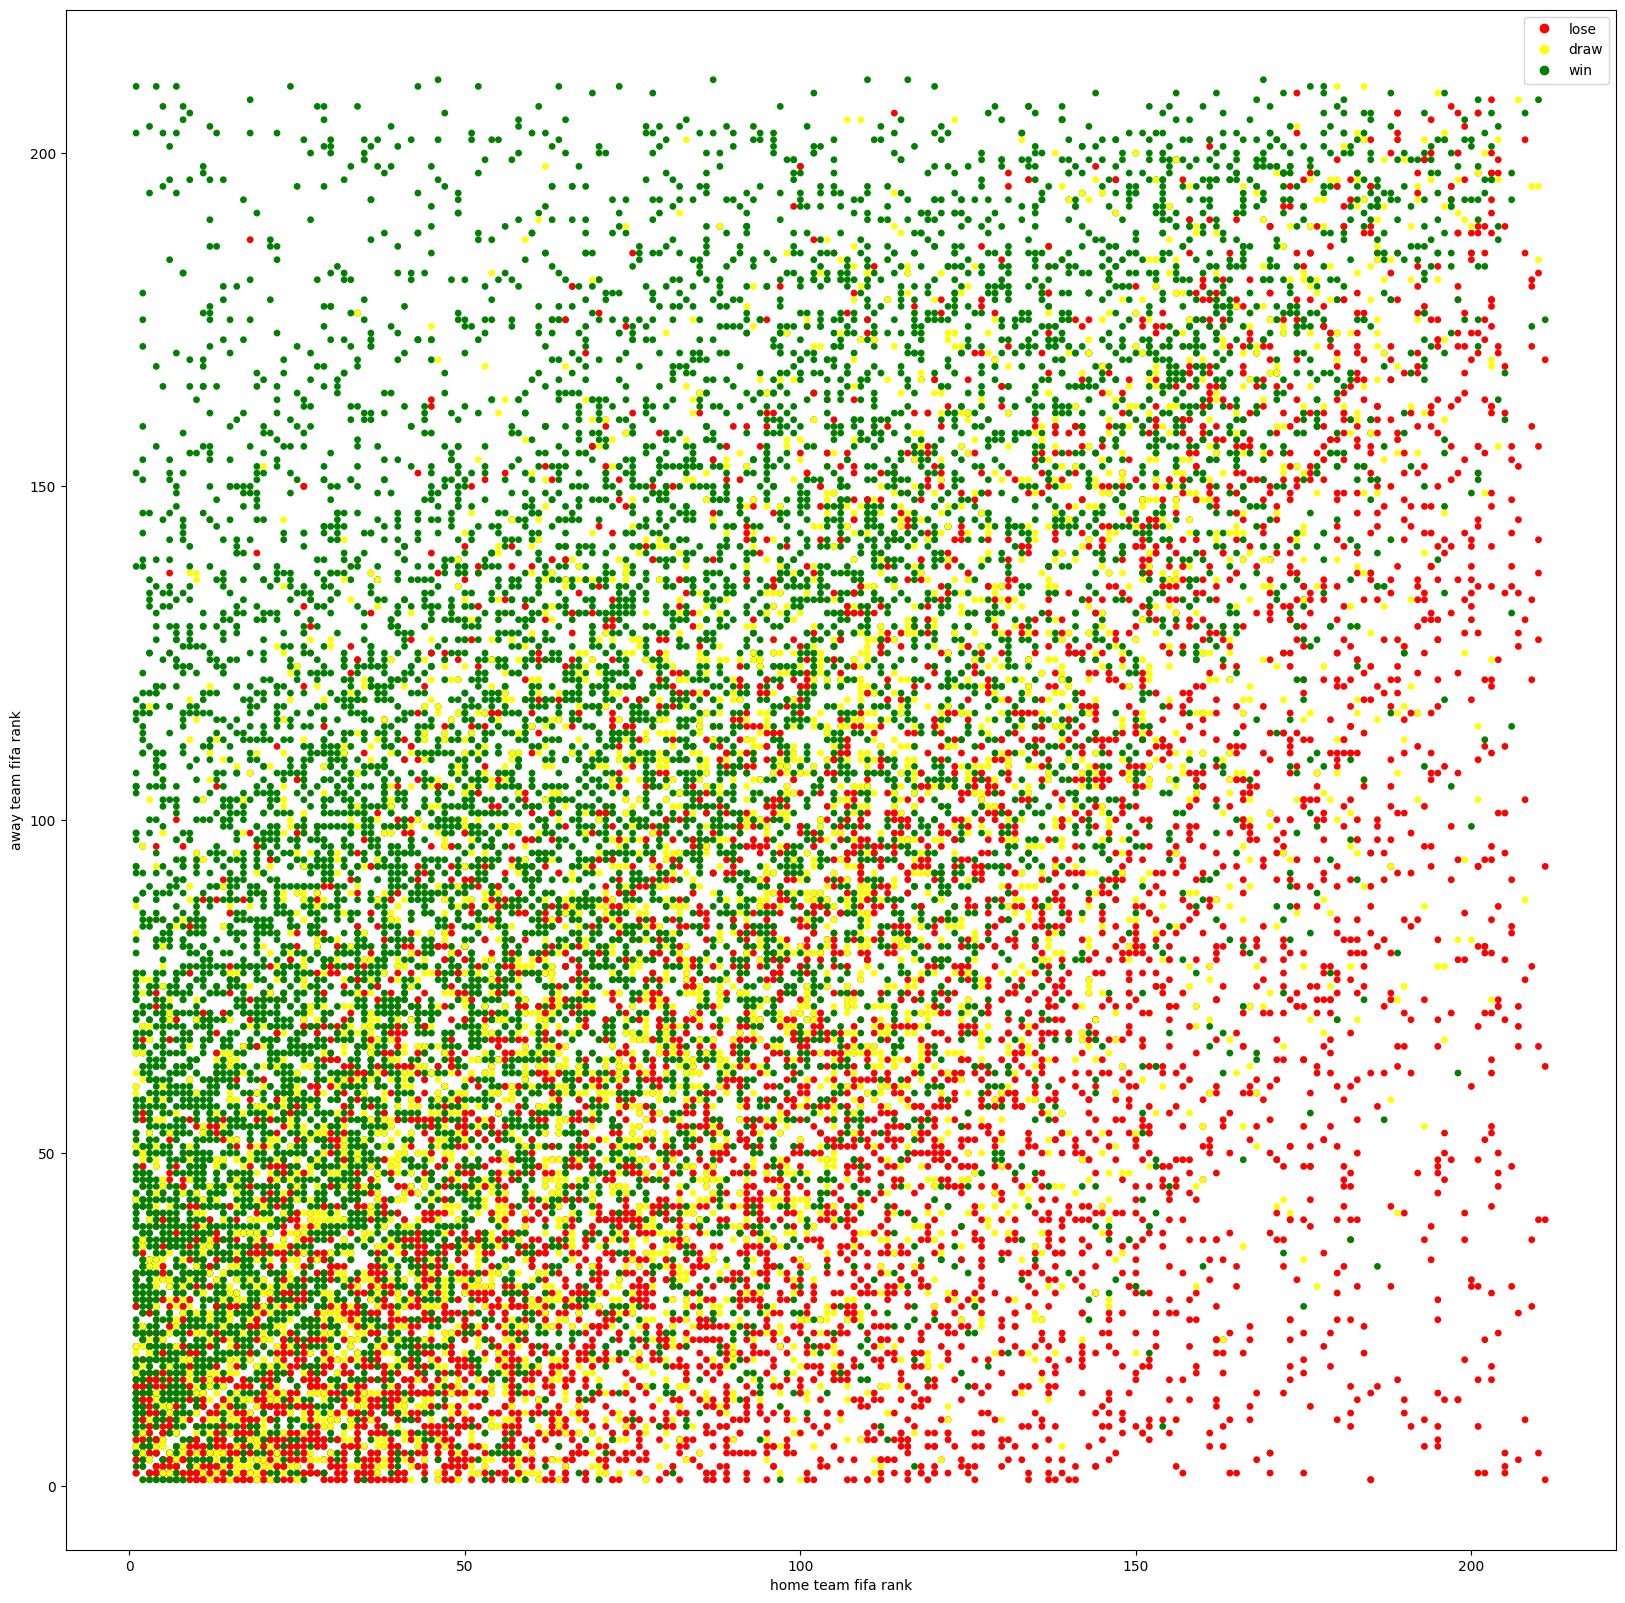

In [3]:
x1 = df['home_team_fifa_rank'].to_numpy()
x2 = df['away_team_fifa_rank'].to_numpy()
y = df['home_team_result']
c = np.zeros(len(y))
c[y == 'Lose'] = -1
c[y == 'Draw'] = 0
c[y == 'Win'] = 1
fig = plt.figure(figsize=(20,20))
scatter = plt.scatter(x1, x2, s=15,  c=c, cmap=cmap(['red','yellow','green'])) 
plt.xlabel('home team fifa rank')
plt.ylabel('away team fifa rank')
plt.legend(handles=scatter.legend_elements()[0], labels=['lose','draw','win'])
plt.show()

# 1.C

In [4]:
df_new = df[['home_team_fifa_rank','away_team_fifa_rank','home_team_total_fifa_points','away_team_total_fifa_points','home_team_result']]
df_new = df_new.loc[df_new["home_team_total_fifa_points"] != 0]
df_new = df_new.loc[df_new["away_team_total_fifa_points"] != 0]
df_new.loc[df_new['home_team_result']=='Win','home_team_result']= 2
df_new.loc[df_new['home_team_result']=='Draw','home_team_result']= 1
df_new.loc[df_new['home_team_result']=='Lose','home_team_result']= 0
df_new['home_team_result'] = df_new['home_team_result'].astype('int')

In [39]:
train, test = train_test_split(df_new, test_size=0.25)
X_train = torch.tensor(train.iloc[:,:4].values, dtype = torch.float32, device = device)
X_test = torch.tensor(test.iloc[:,:4].values, dtype = torch.float32, device = device)
Y_train = torch.tensor(train.iloc[:,4:].values, dtype = torch.int, device = device).long().squeeze()
Y_test = torch.tensor(test.iloc[:,4:].values, dtype = torch.int, device = device).long().squeeze()

#Y_train = torch.zeros((len(train),3),dtype = torch.int32, device = device)
#Y_test = torch.zeros((len(test),3),dtype = torch.int32, device = device)
#for i in range(len(train)):
 #   Y_train[i, train.iloc[i,-1]] = 1
  #  if i < len(test):
  #      Y_test[i, test.iloc[i,-1]] = 1


In [40]:
class create_dataset(Dataset):
    
    def __init__(self, X, Y):
        self.dataset = X
        self.labels = Y
    
    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        return self.dataset[idx], self.labels[idx]

In [41]:
train_set = create_dataset(X_train, Y_train)
test_set = create_dataset(X_test, Y_test)

# 1.D

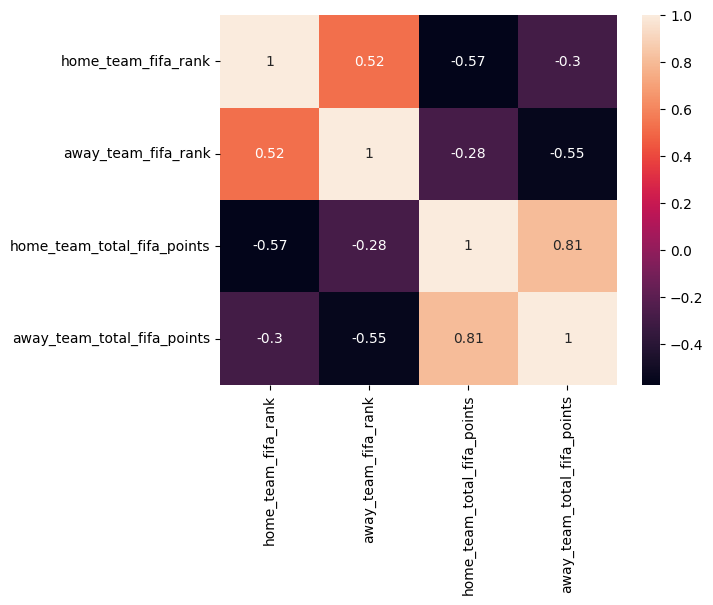

In [43]:
sns.heatmap(df_new.iloc[:,:4].corr(), annot = True); 

# 1.E

In [44]:
class NeuralNetwork(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(in_features=4, out_features=10),
            nn.ReLU(),
            nn.Linear(in_features=10, out_features=20),
            nn.ReLU(),
            nn.Linear(in_features=20, out_features=8),
            nn.ReLU() ,
            nn.Linear(in_features=8, out_features=3),
        )
        
    def forward(self, x):
        return self.linear_relu_stack(x)

In [45]:
model = NeuralNetwork()
model.train()
print(model)

NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=4, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=8, bias=True)
    (5): ReLU()
    (6): Linear(in_features=8, out_features=3, bias=True)
  )
)


# 1.F

In [49]:
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
batch_size = 5
epoch = 10
loss_fn = nn.CrossEntropyLoss()
train_dataloader = DataLoader(train_set, batch_size=batch_size, shuffle=True,drop_last=False)
test_dataloader = DataLoader(test_set, batch_size=batch_size, shuffle=True,drop_last=False)

In [50]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        y=y.squeeze()
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
            
def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            y=y.squeeze()
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [51]:
for t in range(epoch):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 1.132236  [    0/ 7195]
loss: 0.916248  [  500/ 7195]
loss: 0.984462  [ 1000/ 7195]
loss: 0.976024  [ 1500/ 7195]
loss: 1.022528  [ 2000/ 7195]
loss: 0.911609  [ 2500/ 7195]
loss: 0.983861  [ 3000/ 7195]
loss: 0.989920  [ 3500/ 7195]
loss: 1.152196  [ 4000/ 7195]
loss: 0.945512  [ 4500/ 7195]
loss: 0.966829  [ 5000/ 7195]
loss: 0.834254  [ 5500/ 7195]
loss: 1.202549  [ 6000/ 7195]
loss: 0.967459  [ 6500/ 7195]
loss: 1.019808  [ 7000/ 7195]
Test Error: 
 Accuracy: 56.4%, Avg loss: 0.992548 

Epoch 2
-------------------------------
loss: 1.095103  [    0/ 7195]
loss: 1.188880  [  500/ 7195]
loss: 1.257815  [ 1000/ 7195]
loss: 1.093843  [ 1500/ 7195]
loss: 1.121313  [ 2000/ 7195]
loss: 1.088170  [ 2500/ 7195]
loss: 1.185536  [ 3000/ 7195]
loss: 1.088830  [ 3500/ 7195]
loss: 0.981677  [ 4000/ 7195]
loss: 1.191653  [ 4500/ 7195]
loss: 0.976042  [ 5000/ 7195]
loss: 1.223312  [ 5500/ 7195]
loss: 0.736277  [ 6000/ 7195]
loss: 0.954742  [ 6500/ 7195